# Terrain Generator 
Terrain Generation using the Perlin Noise algorithm, NumPy, and Matplotlib

## Importing Libraries

In [1]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math

%matplotlib notebook

## Implementing the Perlin Noise Algorithm

In [2]:
class PerlinNoise:
   def __init__(self):
      self.permutation = np.array([151,160,137,91,90,15, 131,13,201,95,96,53,194,233,7,225,140,36,103,30, 69,142,8,99,37,240,21,10,23,190, 6,148,247,120,234,75,0,26,197,62,94,252,219,203,117,35,11,32,57,177,33, 88,237,149,56,87,174,20,125,136,171,168, 68,175,74,165,71,134,139,48,27,166, 77,146,158,231,83,111,229,122,60,211,133,230,220,105,92,41,55,46,245,40,244, 102,143,54, 65,25,63,161, 1,216,80,73,209,76,132,187,208, 89,18,169,200,196, 135,130,116,188,159,86,164,100,109,198,173,186, 3,64,52,217,226,250,124,123, 5,202,38,147,118,126,255,82,85,212,207,206,59,227,47,16,58,17,182,189,28,42, 223,183,170,213,119,248,152, 2,44,154,163, 70,221,153,101,155,167, 43,172,9, 129,22,39,253, 19,98,108,110,79,113,224,232,178,185, 112,104,218,246,97,228, 251,34,242,193,238,210,144,12,191,179,162,241, 81,51,145,235,249,14,239,107, 49,192,214, 31,181,199,106,157,184, 84,204,176,115,121,50,45,127, 4,150,254, 138,236,205,93,222,114,67,29,24,72,243,141,128,195,78,66,215,61,156,180])
      self.p = np.append(self.permutation, self.permutation)

   def noise2d(self, x, y):
      # get the corner of the squares
      xi = int(math.floor(x)) & 255
      yi = int(math.floor(y)) & 255

      # get gradient vectors
      g1 = self.p[self.p[xi] + yi]
      g2 = self.p[self.p[xi+1] + yi]
      g3 = self.p[self.p[xi] + yi + 1]
      g4 = self.p[self.p[xi+1] + yi + 1]

      # distance vectors
      xf = x - math.floor(x)
      yf = y - math.floor(y)
      d1 = self.dot_product(g1, xf, yf) 
      d2 = self.dot_product(g2, xf-1, yf) 
      d3 = self.dot_product(g3, xf, yf-1) 
      d4 = self.dot_product(g4, xf-1, yf-1) 

      # linear interpolation
      u = self.fade_function(xf)
      v = self.fade_function(yf)
      x1Inter = self.linear_interpolation(u, d1, d2)
      x2Inter = self.linear_interpolation(u, d3, d4)
      yInter = self.linear_interpolation(v, x1Inter, x2Inter)

      return yInter


   def fade_function(self, t):
      return t * t * t * (t * (t * 6 - 15) + 10)
      
   def linear_interpolation(self, amount, left, right):
      return ((1-amount)*left + amount*right)
      
   def dot_product(self, hash, x, y):
      if(hash & 3 == 0):
         return x + y
      elif(hash & 3 == 1):
         return -x + y
      elif(hash & 3 == 2):
         return x - y
      elif(hash & 3 == 3):
         return -x - y
      else:
         return 0

## Using the PerlinNose class

In [3]:
n = PerlinNoise()

def generate_map(width, height, frequency):
    x_line = np.array([])
    y_line = np.array([])
    z_line = np.array([])

    for x in range(width):
       for y in range(height):
          dx = x/float(width)
          dy = y/float(height)

          noise = n.noise2d(dx*frequency, dy*frequency)
          noise = 128*noise + 128
          z_line = np.append(z_line, noise)
          x_line = np.append(x_line, x)
          y_line = np.append(y_line, y)
            
    return (x_line, y_line, z_line)

## Generating the noise

In [4]:
width = 64
height = 64
frequency = 4

x_line, y_line, z_line = generate_map(width, height, frequency)

## Creating two Subplots of the noise

<IPython.core.display.Javascript object>


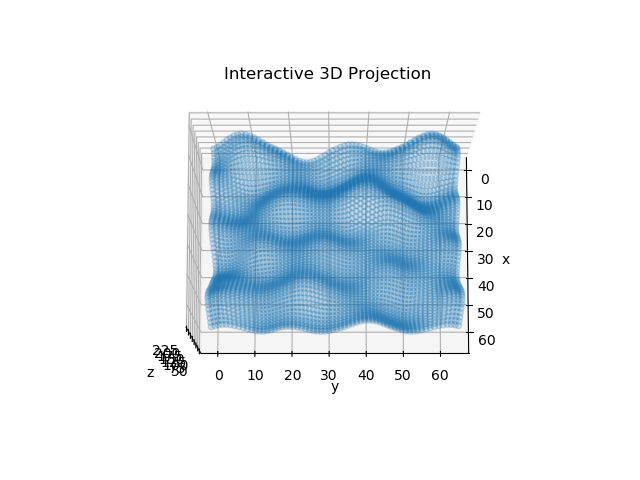

In [5]:
fig1, ax1 = plt.subplots(subplot_kw=dict(projection='3d'))
ax1.set_title('Interactive 3D Projection')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

ax1.scatter(x_line, y_line, z_line, 'gray', alpha=0.2)
ax1.view_init(80, 0)


<IPython.core.display.Javascript object>


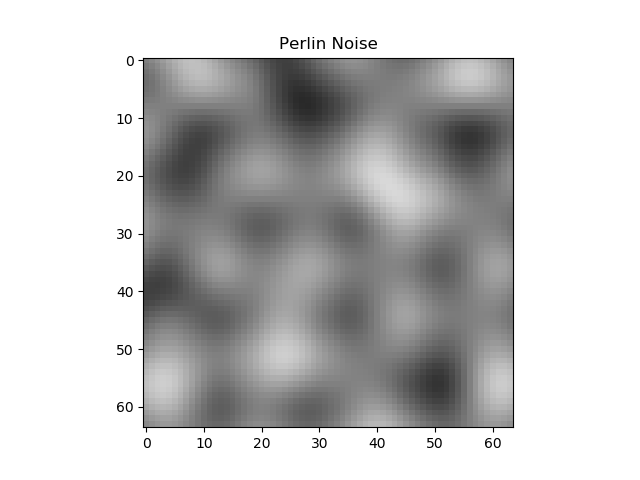

In [6]:
fig2, ax2 = plt.subplots()
ax2.set_title('Perlin Noise')

img = Image.fromarray(z_line.reshape((width, height)))
ax2.imshow(img, cmap='Greys')

## Saving images of the subplots

In [7]:
fig1.savefig('perlin-noise-1.png')
fig2.savefig('perlin-noise-2.png')